# Miriam Analysis: Pybar Observable Trends
    
First Observation: The Urban City Type has the largest number of cities and drivers of the three City Types. 

Second Observation: Even though the Rural City Type has the lowest number of rides and cities, the average fare is typically higher in this area. 

Third Observation: The Total Number of Rides in the Urban City Type have the largest grouping ranging between 16 to 32 rides per city and the average fare is between 20 - 30 dollars. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
c_data = "data/city_data.csv"
r_data = "data/ride_data.csv"

# Read the City and Ride Data
c_data_df = pd.read_csv(c_data)
r_data_df = pd.read_csv(r_data)

# Combine the data into a single dataset
pyber_data_df = pd.merge(r_data_df, c_data_df, how="left", on="city")

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

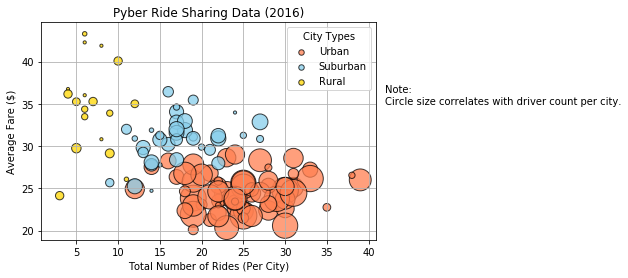

In [2]:
# Obtain the x and y coordinates for each of the three city types

# average fare per city
avg_fare = pyber_data_df[["city","fare"]].groupby(["city"]).mean()
# avg_fare

#total number of rides per city
total_rides = pyber_data_df[["city","ride_id"]].groupby(["city"]).count()
# total_rides

#total number of drivers per city
updated_df = c_data_df.merge(avg_fare,how="left",on="city")
city_df = updated_df.merge(total_rides, how="left", on="city")
city_df.head()

# city type
city_type = city_df["type"].unique()
city_type

# Build the scatter plots for each city types
urban_df = city_df.loc[city_df["type"] == "Urban", :] 
urban_x = urban_df["ride_id"]
urban_y = urban_df["fare"]

suburb_df = city_df.loc[city_df["type"] == "Suburban", :] 
suburb_x = suburb_df["ride_id"]
suburb_y = suburb_df["fare"]

rural_df = city_df.loc[city_df["type"] == "Rural", :]
rural_x = rural_df["ride_id"]
rural_y = rural_df["fare"]

plt.scatter(urban_x, urban_y, marker="o", facecolors="coral", edgecolors="black",
            s=urban_df["driver_count"]*10, alpha=0.75, label="Urban" )
plt.scatter(suburb_x, suburb_y, marker="o", facecolors="skyblue", edgecolors="black",
            s=suburb_df["driver_count"]*10, alpha=0.75, label="Suburban" )
plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black",
            s=rural_df["driver_count"]*10, alpha=0.75, label="Rural" )

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd = plt.legend(loc="upper right", title="City Types",frameon=True)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.annotate("Note:\nCircle size correlates with driver count per city.",
            xy=(40,40), xytext=(42,35))

# Save Figure
plt.savefig("../Images/Fare by City Type.png", bbox_inches="tight")
plt.show()

## Total Fares by City Type

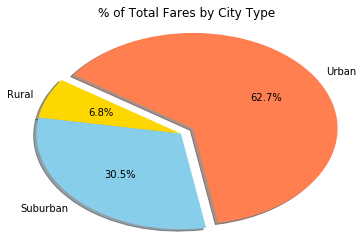

In [3]:
# Calculate Type Percents
pyber_data_df.head()
total_fare = pyber_data_df["fare"].sum()

total_urban_df = pyber_data_df.loc[pyber_data_df["type"] == "Urban", :]
urban_fare = total_urban_df["fare"].sum()
urban_per = urban_fare/total_fare*100

total_suburban_df = pyber_data_df.loc[pyber_data_df["type"] == "Suburban", :]
suburban_fare = total_suburban_df["fare"].sum()
suburban_per = suburban_fare/total_fare*100

total_rural_df = pyber_data_df.loc[pyber_data_df["type"] == "Rural", :]
rural_fare = total_rural_df["fare"].sum()
rural_per = rural_fare/total_fare*100
rural_per

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_per, rural_per, suburban_per]
colors = ["coral", "gold", "skyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes,explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Percentage of Total Fares.png")
plt.show()

## Total Rides by City Type

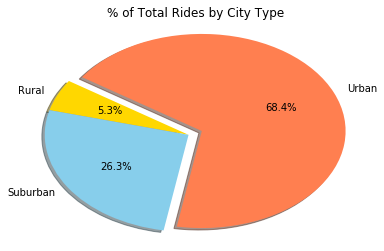

In [4]:
# Calculate Ride Percents
pyber_data_df.head()
ride_total = pyber_data_df["ride_id"].count()

urban_ride = total_urban_df["ride_id"].count()
urban_ride_per = urban_ride/ride_total*100

suburban_ride = total_suburban_df["ride_id"].count()
suburban_ride_per = suburban_ride/ride_total*100

rural_ride = total_rural_df["ride_id"].count()
rural_ride_per = rural_ride/ride_total*100

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_ride_per, rural_ride_per, suburban_ride_per]
colors = ["coral", "gold", "skyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes,explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Percentage of Total Rides.png")
plt.show()

## Total Drivers by City Type

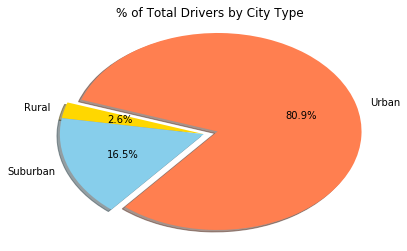

In [5]:
# Calculate Driver Percents
c_data_df
total_drivers = c_data_df["driver_count"].sum()
total_drivers

urban_driver_df = c_data_df.loc[c_data_df["type"] == "Urban", :]
urban_driver = urban_driver_df["driver_count"].sum()
urban_driver_per = urban_driver/total_drivers*100

suburban_driver_df = c_data_df.loc[c_data_df["type"] == "Suburban", :]
suburban_driver = suburban_driver_df["driver_count"].sum()
suburban_driver_per = suburban_driver/total_drivers*100

rural_driver_df = c_data_df.loc[c_data_df["type"] == "Rural", :]
rural_driver = rural_driver_df["driver_count"].sum()
rural_driver_per = rural_driver/total_drivers*100

# Build Pie Charts
labels = ["Urban", "Rural", "Suburban"]
sizes = [urban_driver_per, rural_driver_per, suburban_driver_per]
colors = ["coral", "gold", "skyblue"]
explode = (0.1, 0, 0)

plt.pie(sizes,explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=230)
plt.title("% of Total Drivers by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Percentage of Total Drivers.png")
plt.show()